# HEALTH INSURANCE CLAIM - SQL CASE STUDY

Here, Juypter Notebook is used to run SQL queries and the reason being is to use python to work on queried Data and Visualize it to look at the data in effective manner and not have to use any visualization tool like PowerBI, etc.


About Dataset : Dataset contains information about patient like his/her age, number of children, patientiD, claim, bloodpressure, bmi, etc

In [2]:
#installing mysql-connector-python

pip install mysql-connector-python


  Obtaining dependency information for mysql-connector-python from https://files.pythonhosted.org/packages/d9/91/007a0d60fee8db4f7385075dc50bf62d2d359b417b374ec06b06ce6c2d64/mysql_connector_python-8.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/15.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.4 MB 660.6 kB/s eta 0:00:24
   ---------------------------------------- 0.1/15.4 MB 871.5 kB/s eta 0:00:18
   ---------------------------------------- 0.1/15.4 MB 950.9 kB/s eta 0:00:17
    --------------------------------------- 0.2/15.4 MB 1.0 MB/s eta 0:00:15
    --------------------------------------- 0.3/15.4 MB 1.1 MB/s eta 0:00:15
    --------------------------------------- 0.3/15.4 MB 1.0 MB/s eta 0:00:15
    --------------------------------------- 0.4/15.4 MB 1.0 MB/s eta 0:00:15
   - -------------------------------------- 0.4/15.4 MB 1.1 MB/s eta 0:00:14


In [2]:
#importing required libraries

import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# making connection between mysql database and jupyter notebook

conn = mysql.connector.connect(
        host = 'localhost',
        user = 'root',
        password = '**********',
        database = 'insurance'
)

In [4]:
print(conn)

In [5]:
mycursor = conn.cursor()

In [6]:
mycursor.execute("SELECT * FROM insurance_data")
data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)

In [7]:
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,,male,34.1,100,No,0,No,northwest,1137.01


Problem 1: What are the top 5 patients who claimed the highest insurance amounts?

In [8]:
mycursor.execute("""SELECT * FROM insurance_data 
                    ORDER BY claim DESC
                    Limit 5""")
data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43
1,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
2,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
3,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
4,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40


Problem 2: What is the average insurance claimed by patients based on the number of children they have?

In [27]:
mycursor.execute("""SELECT children, AVG(claim) as average_claim
                    FROM insurance_data
                    GROUP BY children;
                  """)
data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head(6)

,children,average_claim
0,0,12327.993160
1,1,12731.171821
2,2,15073.564000
3,3,15355.318535
4,4,13850.656800
5,5,8786.035556


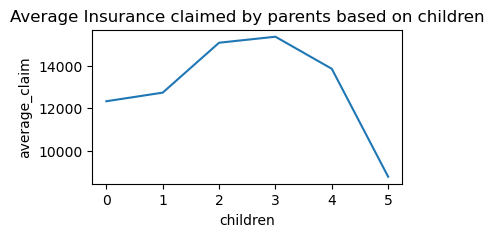

In [28]:
plt.figure(figsize = (4,2))
sns.lineplot(data = df, x = 'children', y = 'average_claim')
plt.title("Average Insurance claimed by parents based on children")
plt.show()

Problem 3: What is the highest and lowest claimed amount by patients in each region?

In [37]:
mycursor.execute("""SELECT region, MAX(claim), MIN(claim) 
                    FROM insurance_data
                    GROUP BY region;
                  """)
data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,region,MAX(claim),MIN(claim)
0,southeast,63770.43,1121.87
1,northwest,60021.40,1136.40
2,,1256.30,1252.41
3,southwest,52590.83,1261.44
4,northeast,58571.07,1694.80


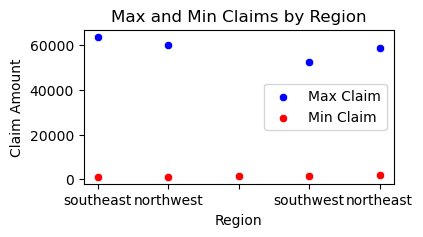

In [45]:
plt.figure(figsize = (4,2))
sns.scatterplot(x='region', y='MAX(claim)', data=df, color='blue', label='Max Claim')
sns.scatterplot(x='region', y='MIN(claim)', data=df, color='red', label='Min Claim')

plt.xlabel('Region')
plt.ylabel('Claim Amount')
plt.title('Max and Min Claims by Region')
plt.legend()

Problem 4: What is the percentage of smokers in each age group?

In [12]:
mycursor.execute("""SELECT age,
                    COUNT(CASE WHEN smoker = 'Yes' THEN 1 END) / COUNT(*) AS smoker_percentage
                    FROM insurance_data
                    GROUP BY age;
                  """)
data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,age,smoker_percentage
0,39.0,0.2692
1,24.0,0.0000
2,,0.0000
3,19.0,0.2414
4,20.0,0.3077


Problem 5: What is the difference between the claimed amount of each patient and the first claimed amount of that patient?

In [13]:
mycursor.execute("""SELECT patientID,
                    claim - LAG(claim) OVER() AS Difference
                    FROM insurance_data
                  """)
data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,patientID,Difference
0,1,NaN
1,2,9.64
2,3,4.43
3,4,0.46
4,5,0.61


Problem 6: For each patient, calculate the difference between their claimed amount and the average claimed amount of patients with the same number of children.

In [46]:
mycursor.execute("""
                  SELECT i1.patientId, i1.children,  MAX(i1.claim), ROUND(i2.average_claim,2) as average_claim, 
                  ROUND(MAX(i1.claim) - i2.average_claim,2) as difference 
                  FROM insurance_data as i1
                  JOIN (
                        SELECT children,
                        AVG(claim) as average_claim
                        FROM insurance_data 
                        GROUP BY children
                        ) AS i2
                  ON i1.children = i2.children
                  GROUP BY i1.patientId, i1.children, i2.average_claim;
                  """)
data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,patientId,children,MAX(i1.claim),average_claim,difference
0,1,0,1121.87,12327.99,-11206.12
1,2,0,1131.51,12327.99,-11196.48
2,3,0,1135.94,12327.99,-11192.05
3,4,0,1136.40,12327.99,-11191.59
4,5,0,1137.01,12327.99,-11190.98


Problem 7: Show the patient with the highest BMI in each region and their respective rank.

In [15]:
mycursor.execute("""
                  SELECT region, MAX(bmi) AS maximum_bmi, 
                  RANK() OVER(ORDER BY MAX(bmi) DESC) AS ranking
                  FROM insurance_data
                  GROUP BY region
                  """)
data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,region,maximum_bmi,ranking
0,northwest,53.1,1
1,southeast,52.6,2
2,northeast,48.1,3
3,southwest,47.6,4
4,,30.4,5


Problem 8: Calculate the difference between the claimed amount of each patient and the claimed amount of the patient who has the highest BMI in their region.

In [16]:
mycursor.execute("""
                  SELECT i1.patientId,  i1.region, MAX(i1.claim) as patient_claim, 
                  ROUND(i2.claim,2) as region_max_claim, 
                  ROUND(MAX(i1.claim) - i2.claim,2) as difference 
                  FROM insurance_data as i1
                  JOIN (
                         SELECT region, MAX(claim) as claim, 
                         MAX(bmi) AS maximum_bmi
                         FROM insurance_data
                         GROUP BY region
                       ) AS i2
                  ON i1.region = i2.region
                  GROUP BY i1.patientId, i1.region, i2.claim;
                """)

data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,patientId,region,patient_claim,region_max_claim,difference
0,1340,southeast,63770.43,63770.43,0.00
1,1339,southeast,62592.87,63770.43,-1177.56
2,1333,southeast,49577.66,63770.43,-14192.77
3,1332,southeast,48970.25,63770.43,-14800.18
4,1331,southeast,48885.14,63770.43,-14885.29


Problem 9: For each patient, calculate the difference in claim amount between the patient and the patient with the highest claim amount among patients with the same bmi and smoker status, within the same region. Return the result in descending order difference.

In [17]:
mycursor.execute("""
                  SELECT i1.patientId,
                  i1.region, MAX(i1.claim) as patient_claim, 
                  ROUND(i2.claim,2) as region_max_claim, 
                  ROUND(MAX(i1.claim) - i2.claim,2) as difference 
                  FROM insurance_data as i1
                  JOIN (
                         SELECT region, MAX(claim) as claim, 
                         MAX(bmi) AS maximum_bmi,
                         smoker
                         FROM insurance_data
                         GROUP BY region, bmi, smoker
                       ) AS i2
                  ON i1.region = i2.region 
                  AND i1.bmi =  maximum_bmi
                  AND i1.smoker = i2.smoker
                  GROUP BY i1.patientId, i1.region, i2.claim
                  ORDER BY difference DESC;
                """)

data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,patientId,region,patient_claim,region_max_claim,difference
0,8,northwest,1146.80,1146.80,0.0
1,9,northwest,1149.40,1149.40,0.0
2,10,northwest,1163.46,1163.46,0.0
3,11,northwest,1241.57,1241.57,0.0
4,12,northwest,1242.26,1242.26,0.0


Problem 10: For each patient, find the maximum BMI value among their next three records (ordered by age).

In [18]:
mycursor.execute("""
                  SELECT patientiD, age, 
                  MAX(bmi) OVER(rows between 3 preceding and current row) as bmi 
                  FROM insurance_data
                  ORDER BY age

                """)

data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,patientiD,age,bmi
0,3,,33.3
1,4,,33.7
2,5,,34.1
3,6,,34.4
4,7,,37.3


Problem 11: For each patient, find the rolling average of the last 2 claims.

In [19]:
mycursor.execute("""
                  SELECT patientiD, 
                  AVG(SUM(claim)) OVER(ROWS Between 2 preceding and current Row) as rolling_avg 
                  FROM insurance_data
                  GROUP BY patientiD;
                """)

data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,patientiD,rolling_avg
0,1,1121.870000
1,2,1126.690000
2,3,1129.773333
3,4,1134.616667
4,5,1136.450000


Problem 12: Find the first claimed insurance value for male and female patients, within each region order the data by patient age in ascending order, and only include patients who are non-diabetic and have a bmi value between 25 and 30.

In [23]:
mycursor.execute("""
                  SELECT * FROM ( SELECT patientiD,gender, age, region, claim, 
                                  ROW_NUMBER() OVER(partition by gender order by age) AS ranking 
                                  FROM insurance_data
                                  WHERE diabetic = 'No' AND bmi >= 25 AND bmi <= 30) as t
                  WHERE t.ranking = 1
                  ORDER BY age
                """)

data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,patientiD,gender,age,region,claim,ranking
0,42,male,18.0,northwest,1635.73,1
1,285,female,25.0,northwest,4189.11,1


Problem 13: Find the distribution of claimed insurance value for male and female patients, within each region order the data by patient age in ascending order, and only include patients who are non-diabetic and have a bmi value between 25 and 30.

In [48]:
mycursor.execute("""
                  SELECT * FROM ( SELECT patientiD,gender, age, region, claim, 
                                  ROW_NUMBER() OVER(partition by gender order by age) AS ranking 
                                  FROM insurance_data
                                  WHERE diabetic = 'No' AND bmi >= 25 AND bmi <= 30) as t
                  ORDER BY ranking
                """)

data = mycursor.fetchall() 

df = pd.DataFrame(data, columns=mycursor.column_names)
df.head()

,patientiD,gender,age,region,claim,ranking
0,285,female,25.0,northwest,4189.11,1
1,42,male,18.0,northwest,1635.73,1
2,703,female,26.0,southwest,9861.03,2
3,565,male,18.0,southeast,7742.11,2
4,508,female,26.0,southwest,7050.64,3


Text(0, 0.5, 'Number of Patients')

<Figure size 400x200 with 0 Axes>

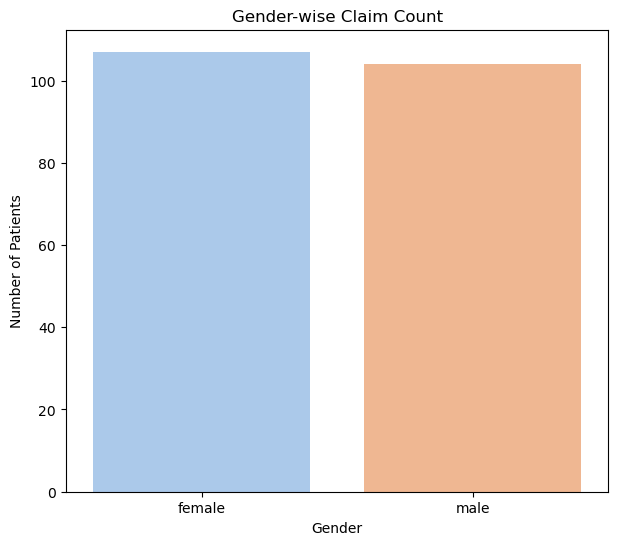

In [62]:
plt.figure(figsize = (4,2))
gender_counts = df.groupby('gender')['patientiD'].nunique()
plt.figure(figsize=(7, 6))
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
ax.set_title("Gender-wise Claim Count", y=1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Patients')